In [5]:
import altair as alt

# saving data into a file rather than embedding into the chart
# alt.data_transformers.enable('json') 
# alt.data_transformers.enable('data_server')
alt.data_transformers.enable('default')
alt.renderers.enable('notebook')
# alt.renderers.enable('jupyterlab')
from vega_datasets import data
import pandas as pd
from altair import Scale,Color

In [6]:
file = 'annual_county_level.csv'

In [7]:
dforg = pd.read_csv(file,header=0)

In [8]:
dforg.head()

Unnamed: 0 state  fips  year    BUYER_COUNTY    pills  population  \
0           1    AK  2013  2006  ALEUTIANS EAST    300.0        2794   
1           2    AK  2013  2007  ALEUTIANS EAST    100.0        3012   
2           3    AK  2016  2006  ALEUTIANS WEST  26700.0        5658   
3           4    AK  2016  2007  ALEUTIANS WEST  33500.0        5466   
4           5    AK  2016  2008  ALEUTIANS WEST  30000.0        5393   

   Pill_per_pop  
0      0.107373  
1      0.033201  
2      4.718982  
3      6.128796  
4      5.562767

In [10]:
dforg.describe()

Unnamed: 0          fips          year         pills    population  \
count  20988.000000  20988.000000  20988.000000  2.098800e+04  2.098800e+04   
mean   10494.500000  30287.508529   2009.000000  3.646579e+06  1.010772e+05   
std     6058.858061  15118.266208      2.001572  9.739507e+06  3.153288e+05   
min        1.000000   1001.000000   2006.000000  2.000000e+01  4.890000e+02   
25%     5247.750000  18173.000000   2007.000000  3.506825e+05  1.285575e+04   
50%    10494.500000  29118.000000   2009.000000  1.080840e+06  2.769200e+04   
75%    15741.250000  45041.500000   2011.000000  3.076068e+06  7.005025e+04   
max    20988.000000  56045.000000   2012.000000  2.326166e+08  9.840024e+06   

       Pill_per_pop  
count  20988.000000  
mean      38.562225  
std       24.920452  
min        0.005968  
25%       22.587628  
50%       34.015286  
75%       48.676498  
max      501.605074

In [11]:
fdf = dforg[['fips','year','Pill_per_pop']]
fdf.to_csv('sample_data.csv',index=False)

In [12]:
fdf = dforg[['fips','year','Pill_per_pop','BUYER_COUNTY','state']]

In [13]:
fdf['Pill_per_pop'] = fdf["Pill_per_pop"].astype(int)
fdf['BUYER_COUNTY'] = fdf["BUYER_COUNTY"].astype(str)
fdf['state'] = fdf["state"].astype(str)
fdf.loc[fdf['Pill_per_pop']>150, ['Pill_per_pop']] = 150

C:\Users\Satya\Anaconda3\envs\dviz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Satya\Anaconda3\envs\dviz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Satya\Anaconda3\envs\dviz\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [14]:
dummy = 'nothing'

#The color scheme we use is yellowgreenblue

In [15]:
# import matplotlib
# from matplotlib import *
# # Mention the color scheme/map you are using currently
# cmap = cm.get_cmap('viridis_r', 15)
# cutoff = 0
# for i in range(cmap.N):
#     rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
#     print(matplotlib.colors.rgb2hex(rgb))
#     if i == cutoff:
#         dummy = matplotlib.colors.rgb2hex(rgb)

In [21]:
dummy = '#EEFBB3'
# dummy = '#E1EDAA'

In [22]:
def choropleth(data,level,year=2006,color=True,scheme='yellowgreenblue',dummy=dummy,stroke='black',strokeWidth=0.05,type='linear',fips='fips'):
    if color:
        chart = alt.Chart(level).mark_geoshape(
            stroke=stroke,
            strokeWidth=strokeWidth
        ).project(
            type='albersUsa'
        ).transform_lookup(
            lookup='id',
            from_=alt.LookupData(data, fips, ['year','Pill_per_pop','BUYER_COUNTY','state'])
        ).transform_calculate(
            Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
        ).encode(
            color = alt.condition(
                'datum.Pill_per_pop > 0',
                alt.Color('Pill_per_pop:Q', scale=Scale(scheme=scheme,type=type)),
                alt.value(dummy)
                ),
            tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
        ).properties(
            width=700,
            height=400,
            title='Pills per person, {}'.format(year)
        )
    else:
        chart = alt.Chart(level).mark_geoshape(
            stroke=stroke,
            strokeWidth=strokeWidth
        ).project(
            type='albersUsa'
        ).transform_lookup(
            lookup='id',
            from_=alt.LookupData(data, fips, ['year','Pill_per_pop','BUYER_COUNTY','state'])
        ).transform_calculate(
            Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
        ).encode(
            tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
        ).properties(
            width=700,
            height=400,
            title='Pills per person, {}'.format(year)
        )
        
    return chart

In [23]:
states = alt.topo_feature(data.us_10m.url, 'states')
counties = alt.topo_feature(data.us_10m.url+'#', 'counties')

In [24]:
def plot_year(year,fdf=fdf,counties=counties,states=states,state_stroke='black',state_strokew=0.15):
    fdf1 = fdf[fdf.year==year]
    chart = choropleth(fdf1,counties,year=year)
    
    outline = alt.Chart(states).mark_geoshape(stroke=state_stroke,strokeWidth=state_strokew).project(
    type='albersUsa'
    )
    
    chart1 = choropleth(fdf1,counties,color=False,year=year)
    
    return chart+outline+chart1

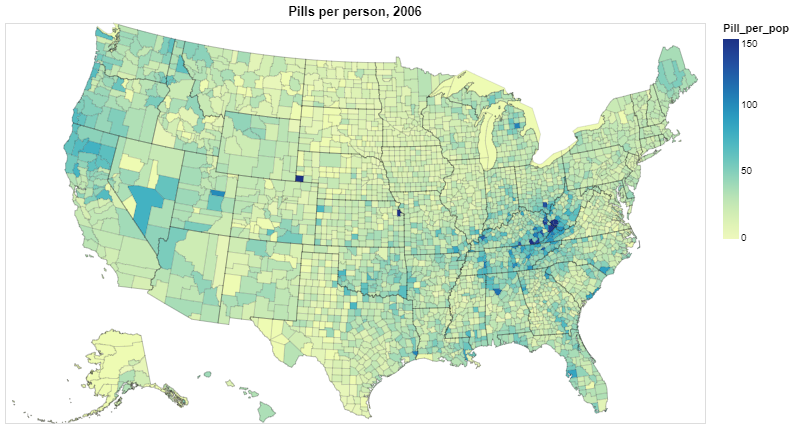

In [25]:
plot_year(2006)

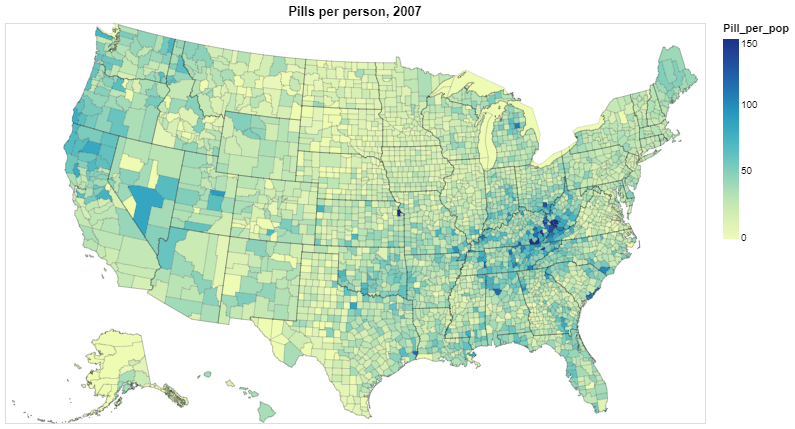

In [17]:
plot_year(2007)

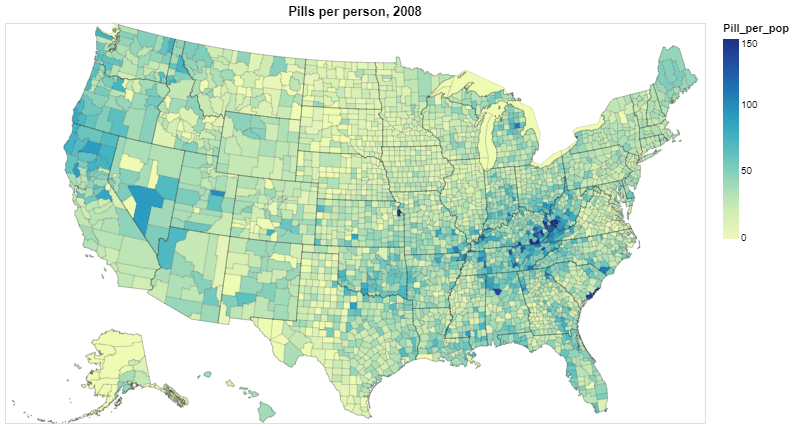

In [18]:
plot_year(2008)

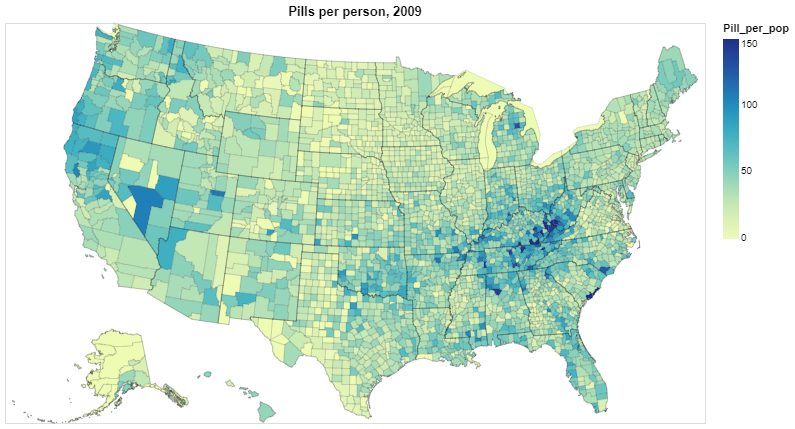

In [19]:
plot_year(2009)

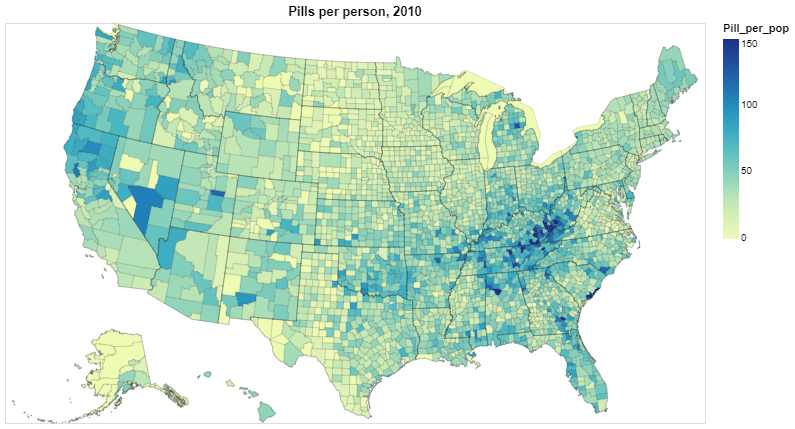

In [20]:
plot_year(2010)

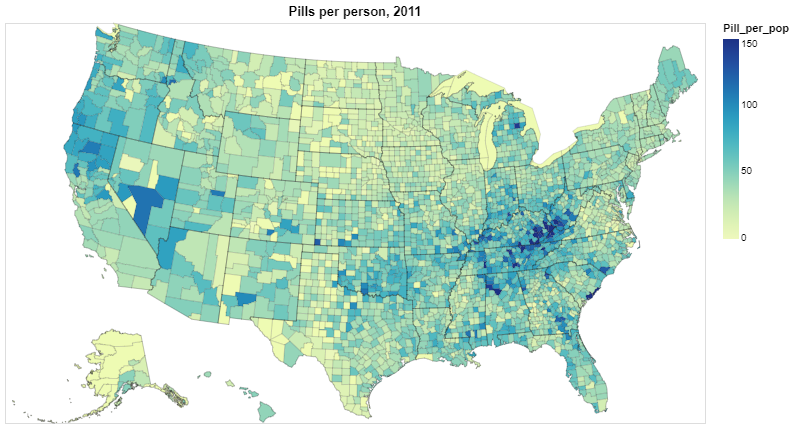

In [21]:
plot_year(2011)

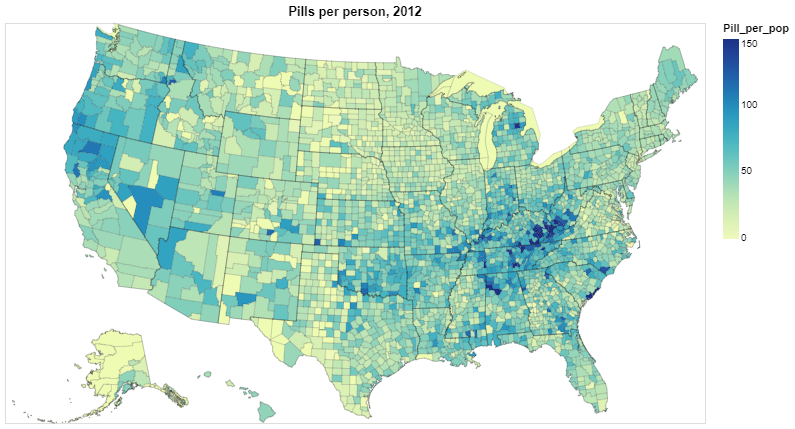

In [22]:
plot_year(2012)

In [23]:
dummy='#dbe9f6'
scheme='blues'
type1='linear'

fg = alt.Chart(counties).mark_geoshape(
        stroke='black',
        strokeWidth=0.05
    ).project(
        type='albersUsa'
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(fdf, 'fips', ['year','Pill_per_pop','BUYER_COUNTY', 'state'])
    ).transform_calculate(
        Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
    ).encode(
        color = alt.condition(
            'datum.Pill_per_pop > 0',
            alt.Color('Pill_per_pop:Q', scale=Scale(scheme=scheme,type=type1)),
            alt.value(dummy)
            ),
        tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
    ).properties(
        width=700,
        height=400,
        title='Pills per person'
)

outline = alt.Chart(states).mark_geoshape(stroke='black',strokeWidth=0.2).project(
    type='albersUsa'
    )

fg1 = alt.Chart(counties).mark_geoshape(
        stroke='black',
        strokeWidth=0.05
    ).project(
        type='albersUsa'
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(fdf, 'fips', ['year','Pill_per_pop','BUYER_COUNTY', 'state'])
    ).transform_calculate(
        Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
    ).encode(
        tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
    ).properties(
        width=700,
        height=400,
        title='Pills per person'
)

fg+outline+fg1

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

In [24]:
fdfn = fdf.pivot_table(index='fips',columns='year',values=['Pill_per_pop']).reset_index('fips')

In [25]:
fdfn = fdfn.set_index('fips').join(fdf[['fips','BUYER_COUNTY','state']].set_index('fips'))

C:\Users\Satya\Anaconda3\envs\dviz\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [26]:
fdfn.columns = [str(i[1]) if type(i)==tuple else i for i in fdfn.columns]

In [27]:
fdfn.columns

Index(['2006', '2007', '2008', '2009', '2010', '2011', '2012', 'BUYER_COUNTY',
       'state'],
      dtype='object')

In [28]:
fdfn.head()

2006  2007  2008  2009  2010  2011  2012 BUYER_COUNTY state
fips                                                             
1001  44.0  49.0  52.0  62.0  59.0  65.0  68.0      AUTAUGA    AL
1001  44.0  49.0  52.0  62.0  59.0  65.0  68.0      AUTAUGA    AL
1001  44.0  49.0  52.0  62.0  59.0  65.0  68.0      AUTAUGA    AL
1001  44.0  49.0  52.0  62.0  59.0  65.0  68.0      AUTAUGA    AL
1001  44.0  49.0  52.0  62.0  59.0  65.0  68.0      AUTAUGA    AL

In [29]:
fdfn = fdfn.reset_index()

In [30]:
# dummy='#dbe9f6'
# scheme='blues'
# type1='linear'

# fg = alt.Chart(counties).mark_geoshape(
#         stroke='black',
#         strokeWidth=0.05
#     ).project(
#         type='albersUsa'
#     ).transform_lookup(
#         lookup='id',
#         from_=alt.LookupData(fdfn, 'fips', ['year','Pill_per_pop','BUYER_COUNTY', 'state'])
#     ).transform_calculate(
#         Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
#     ).encode(
#         color = alt.condition(
#             'datum.Pill_per_pop > 0',
#             alt.Color('Pill_per_pop:Q', scale=Scale(scheme=scheme,type=type1)),
#             alt.value(dummy)
#             ),
#         tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
#     ).properties(
#         width=700,
#         height=400,
#         title='Pills per person'
# )

# outline = alt.Chart(states).mark_geoshape(stroke='black',strokeWidth=0.2).project(
#     type='albersUsa'
#     )

# fg1 = alt.Chart(counties).mark_geoshape(
#         stroke='black',
#         strokeWidth=0.05
#     ).project(
#         type='albersUsa'
#     ).transform_lookup(
#         lookup='id',
#         from_=alt.LookupData(fdfn, 'fips', ['year','Pill_per_pop','BUYER_COUNTY', 'state'])
#     ).transform_fold(
#     columns, as_=['year', 'Pill_per_pop']
#     ).transform_calculate(
#         Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
#     ).encode(
#         tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
#     ).properties(
#         width=700,
#         height=400,
#         title='Pills per person'
# )

# # fg+outline+fg1

In [31]:
dummy='#dbe9f6'
scheme='blues'
type1='linear'

slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="key", fields=['key'],
                                   bind=slider, init={'key': 2006})

fg = alt.Chart(counties).mark_geoshape(
        stroke='black',
        strokeWidth=0.05
    ).project(
        type='albersUsa'
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(fdfn, 'fips', [str(i) for i in range(2006,2013)]+['Pill_per_pop','BUYER_COUNTY', 'state'])
    ).transform_calculate(
        Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
    ).transform_fold(
    [str(i) for i in range(2006,2013)],
    ).encode(
        color = alt.condition(
            'datum.Pill_per_pop > 0',
            alt.Color('Pill_per_pop:Q', scale=Scale(scheme=scheme,type=type1)),
            alt.value(dummy)
            ),
        tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','key:Q']
    ).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

In [ ]:
fg

In [32]:
fdfn = fdf.pivot_table(index='fips',columns='year',values=['Pill_per_pop']).reset_index('fips')
fdfn = fdfn.set_index('fips').join(fdf[['fips','BUYER_COUNTY','state']].set_index('fips'))

In [33]:
fdfn = fdf.pivot_table(index='fips',columns='year',values=['Pill_per_pop']).reset_index('fips')

In [34]:
fdfn

fips Pill_per_pop                                    
year                2006  2007  2008  2009  2010  2011  2012
0      1001         44.0  49.0  52.0  62.0  59.0  65.0  68.0
1      1003         37.0  44.0  49.0  56.0  61.0  68.0  78.0
2      1005         29.0  34.0  36.0  37.0  45.0  50.0  52.0
3      1007         34.0  38.0  46.0  47.0  49.0  57.0  56.0
4      1009         23.0  25.0  26.0  29.0  31.0  36.0  38.0
...     ...          ...   ...   ...   ...   ...   ...   ...
3029  56037         26.0  25.0  25.0  29.0  31.0  35.0  41.0
3030  56039         23.0  18.0  18.0  18.0  27.0  25.0  27.0
3031  56041         34.0  37.0  37.0  41.0  43.0  43.0  44.0
3032  56043         44.0  46.0  49.0  53.0  58.0  63.0  64.0
3033  56045         28.0  32.0  35.0  31.0  32.0  34.0  33.0

[3034 rows x 8 columns]

In [35]:
fdfn.columns = [str(i[1]) if type(i)==tuple else i for i in fdfn.columns]

In [36]:
fdfn.columns = ['fips' if i=='' else i for i in fdfn.columns ]

In [37]:
fdfn.to_csv('sample_data_pivot.csv',index=False)

In [38]:
import altair as alt
import pandas as pd
from vega_datasets import data

fdf = pd.read_csv('https://raw.githubusercontent.com/sdasara95/Opioid-Crisis/master/sample_data.csv')
fdf['year'] = fdf['year'].astype(str)
fdf = fdf.pivot(index='fips', columns='year', values='Pill_per_pop').reset_index()
columns = [str(year) for year in range(2006, 2013)]

slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2006})

a = alt.Chart(counties).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'fips', columns)
).transform_fold(
    columns, as_=['year', 'Pill_per_pop']
).transform_calculate(
    year='parseInt(datum.year)',
    Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
).encode(
    color = alt.condition(
        'datum.Pill_per_pop > 0',
        alt.Color('Pill_per_pop:Q', scale=alt.Scale(scheme='blues')),
        alt.value('#dbe9f6')
    )).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

b = outline = alt.Chart(states).mark_geoshape(stroke='black',strokeWidth=0.2).project(
    type='albersUsa'
    )

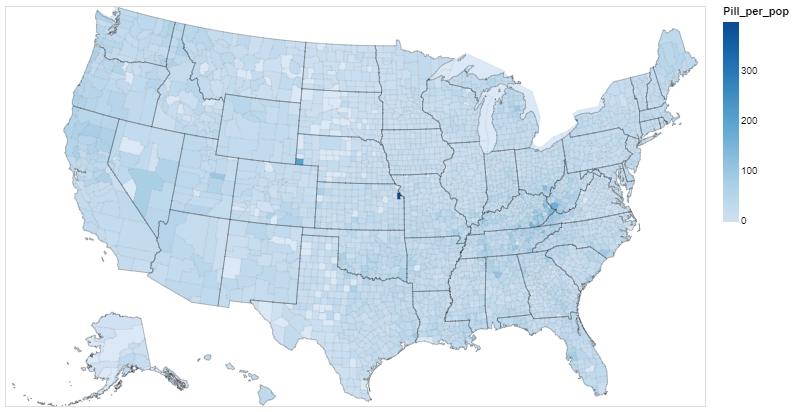

In [39]:
a+b

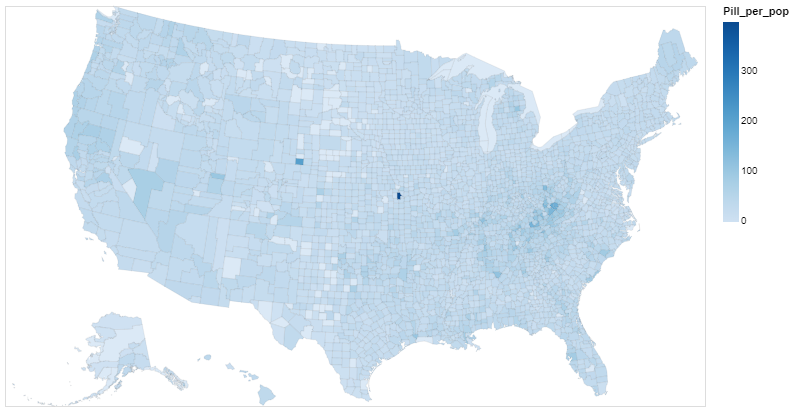

In [40]:
import altair as alt
import pandas as pd
from vega_datasets import data

us_counties = alt.topo_feature(data.us_10m.url, 'counties')
fdf = pd.read_csv('https://raw.githubusercontent.com/sdasara95/Opioid-Crisis/master/sample_data.csv')
fdf['year'] = fdf['year'].astype(str)
fdf = fdf.pivot(index='fips', columns='year', values='Pill_per_pop').reset_index()
columns = [str(year) for year in range(2006, 2013)]

slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2006})

alt.Chart(us_counties).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'fips', columns)
).transform_fold(
    columns, as_=['year', 'Pill_per_pop']
).transform_calculate(
    year='parseInt(datum.year)',
    Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
).encode(
    color = alt.condition(
        'datum.Pill_per_pop > 0',
        alt.Color('Pill_per_pop:Q', scale=alt.Scale(scheme='blues')),
        alt.value('#dbe9f6')
    )).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

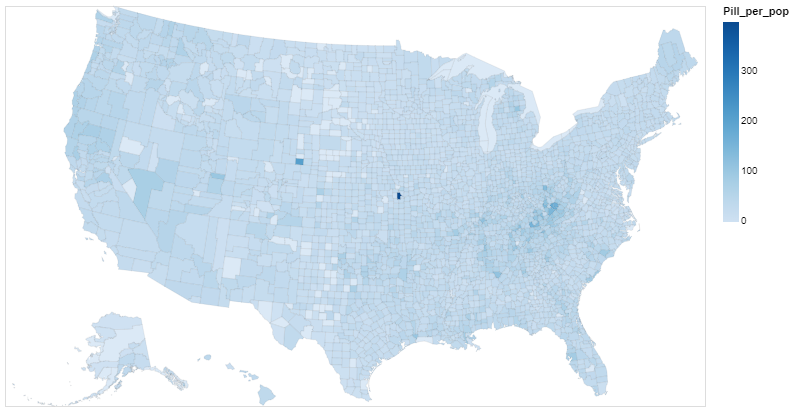

In [41]:
import altair as alt
import pandas as pd
from vega_datasets import data

us_counties = alt.topo_feature(data.us_10m.url, 'counties')
fdf = pd.read_csv('https://raw.githubusercontent.com/sdasara95/Opioid-Crisis/master/sample_data.csv')
fdf['year'] = fdf['year'].astype(str)
fdf = fdf.pivot(index='fips', columns='year', values='Pill_per_pop').reset_index()
columns = [str(year) for year in range(2006, 2013)]

slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2006})

chart = alt.Chart(us_counties).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'fips', columns)
).transform_fold(
    columns, as_=['year', 'Pill_per_pop']
).transform_calculate(
    year='parseInt(datum.year)',
    Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
).encode(
    color = alt.condition(
        'datum.Pill_per_pop > 0',
        alt.Color('Pill_per_pop:Q', scale=alt.Scale(scheme='blues')),
        alt.value('#dbe9f6')
    )).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

chart

In [42]:
chart.save('chart.html', embed_options={'renderer':'svg'})